In [15]:
from joblib import load
import pandas as pd
import shap
from sklearn.linear_model import RidgeClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [2]:
df_data = pd.read_csv("../clustering_examples/estimated_properties.csv")
df_data.head()

,sequence,Activity,MW,isoelectric_point,aromaticity,aliphatic_index,boman_index,charge,charge_density,hydrophobic_ratio,instability_index
0,KKKKVVEATYVLV,1,1503.88,10.7646,0.0769,126.9231,0.6792,3.996,0.00266,0.4615,2.7000
1,GLPVCGESCFGGSCYTPGCSCTWPICTRD,1,2999.44,5.8203,0.1034,36.8966,0.5838,-0.408,-0.00014,0.3448,79.3310
2,MQYKINMYAIVVYDVNVSRQNQIREFLRKYLYHVQRSVFEGEISPS...,1,10913.64,8.9775,0.1319,108.0220,1.5576,2.028,0.00019,0.3846,60.4879
3,KQEGRDHDKSKGHFHMIVIHHKGGQAHHG,1,3308.67,10.6753,0.0345,40.3448,2.8534,3.689,0.00111,0.2069,19.3345
4,LAHKSRLYERHM,1,1539.81,11.2881,0.0833,73.3333,3.4217,3.194,0.00207,0.3333,47.6417


In [4]:
df_values = df_data.drop(columns=["sequence", "Activity"])
response = df_data["Activity"].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_values, response, test_size=.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)

In [16]:
model = RidgeClassifier().fit(X=X_train, y=y_train)

In [17]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_val)

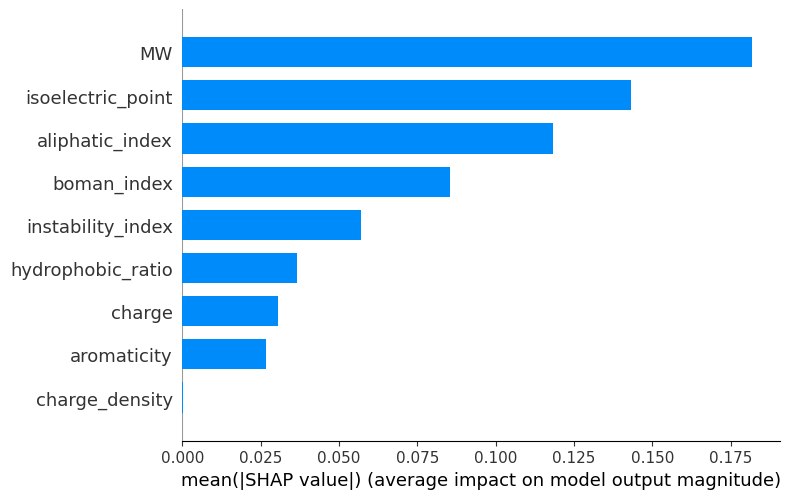

In [19]:
shap.summary_plot(shap_values, X_val, plot_type="bar", show=False)

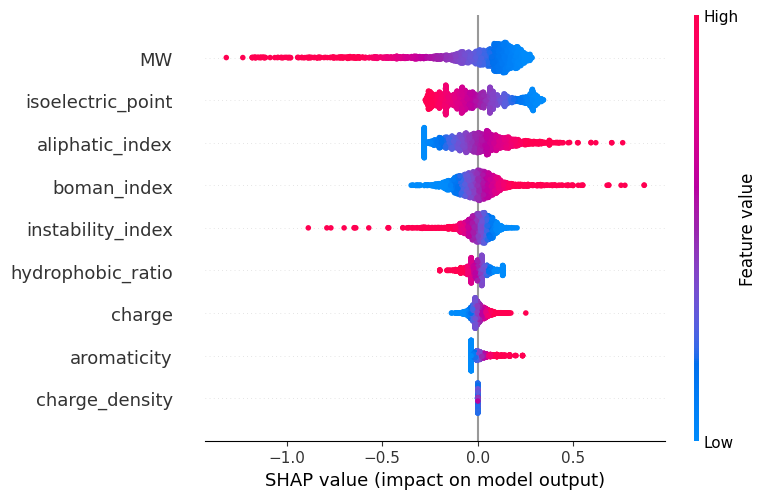

In [20]:
shap.summary_plot(shap_values, X_val, show=False)

In [28]:
y_predict = model.predict(X_val)
y_predict[:30]

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0])

In [24]:
y_val[:30]

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0])

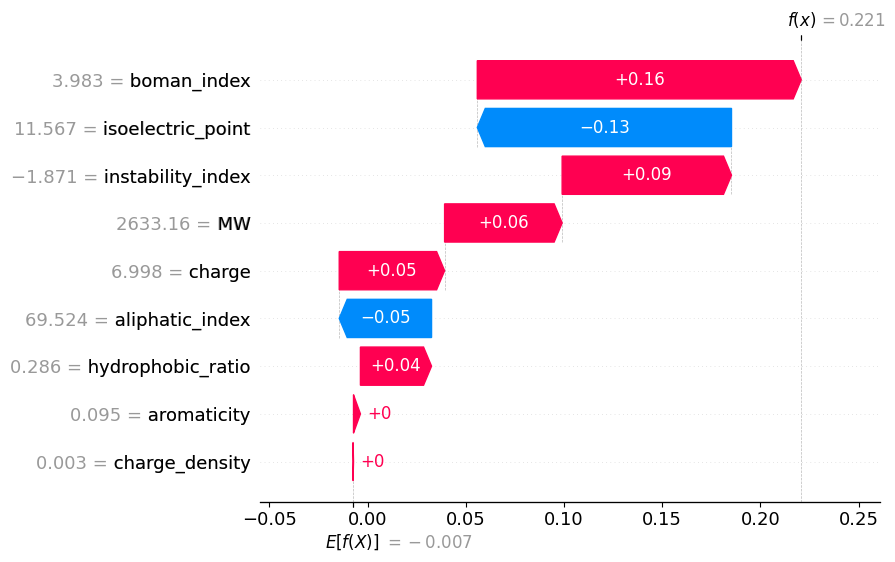

In [29]:
shap.plots.waterfall(shap_values[5])

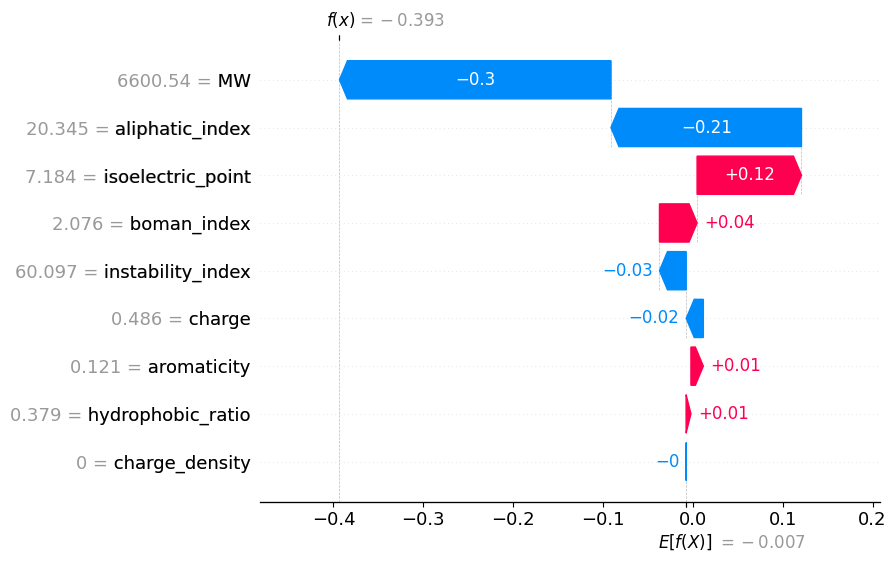

In [27]:
shap.plots.waterfall(shap_values[3])

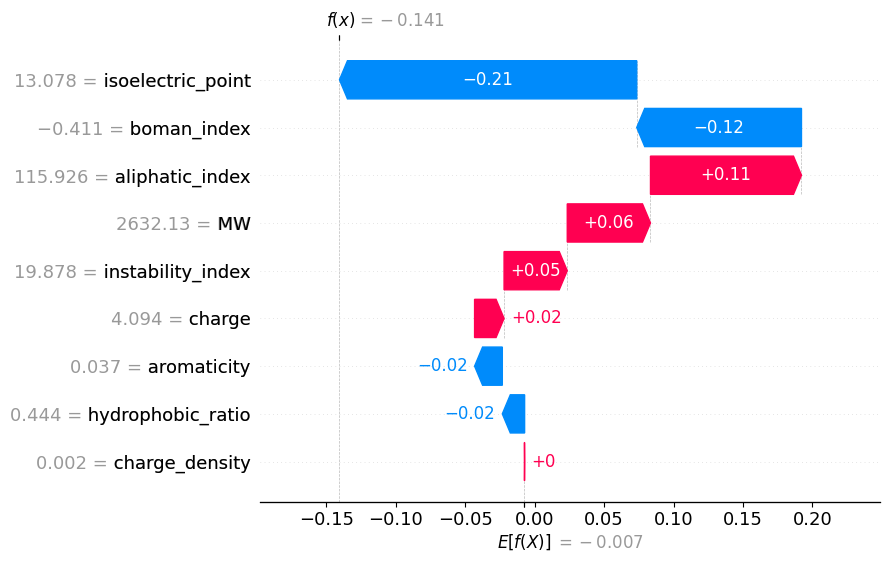

In [26]:
shap.plots.waterfall(shap_values[1])

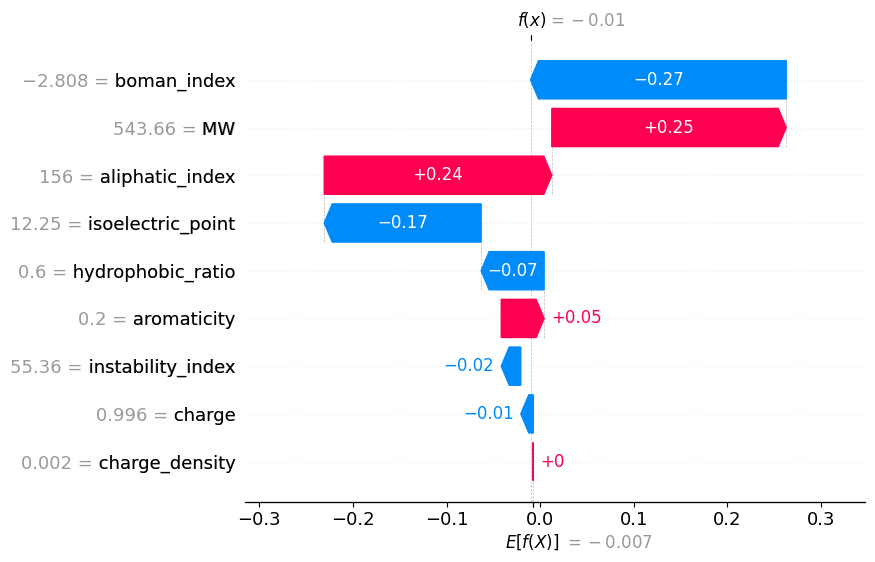

In [25]:
shap.plots.waterfall(shap_values[0])